#### Alternative method to read data 
________________________________________________________________________________________________

________________________________________________________________________________________________

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import rasterio
from rasterio.plot import show

import tifffile

from bs4 import BeautifulSoup

In [4]:
import rioxarray

In [5]:
image_name = "ENMAP01-____L2A-DT0000004850_20221026T112131Z_005_V010201_20230421T172449Z-SPECTRAL_IMAGE.TIF"
root_path = "ENMAP01-____L2A-DT0000004850_20221026T112131Z_005_V010201_20230421T172449Z"


In [6]:
xds = rioxarray.open_rasterio(os.path.join(root_path, image_name))
xds

<xarray.DataArray (band: 224, y: 1212, x: 1236)>
[335559168 values with dtype=int16]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 ... 218 219 220 221 222 223 224
  * x            (x) float64 5.86e+05 5.861e+05 ... 6.231e+05 6.231e+05
  * y            (y) float64 5.83e+06 5.83e+06 5.83e+06 ... 5.793e+06 5.793e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        8477
    STATISTICS_MEAN:           285.59873267932
    STATISTICS_MINIMUM:        -68
    STATISTICS_STDDEV:         662.82455149918
    STATISTICS_VALID_PERCENT:  67.29
    _FillValue:                -32768
    scale_factor:              1.0
    add_offset:                0.0

In [7]:
src = rasterio.open(os.path.join(root_path, image_name))

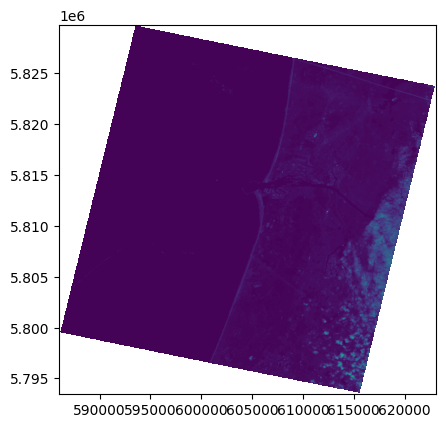

<Axes: >

In [15]:
show(src)

In [13]:
src_array = src.read()

In [14]:
src_array.shape

(224, 1212, 1236)

In [ ]:
src

In [12]:
src_file

array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]],

       [[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32

In [49]:
tiff = tifffile.imread(os.path.join(root_path, image_name))

In [50]:
tiff.shape

(224, 1212, 1236)

In [55]:
new_tiff = np.swapaxes(tiff, 0, 2)
new_tiff = np.swapaxes(new_tiff, 0, 1)

In [56]:
new_tiff.shape

(1212, 1236, 224)

In [183]:
red = new_tiff[:, :, 150]
green = new_tiff[:, :, 160]
blue = new_tiff[:, :, 170]
TCI = np.stack([red, green, blue], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


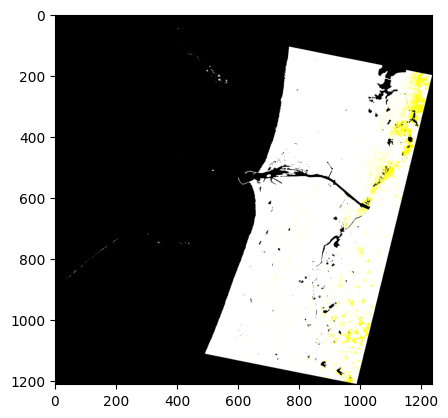

In [184]:
plt.imshow(TCI)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


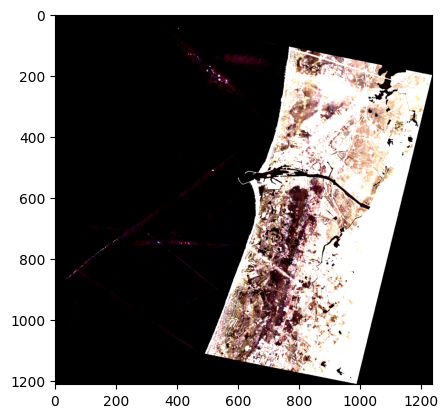

In [75]:
plt.imshow(new_tiff[:, :, 0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


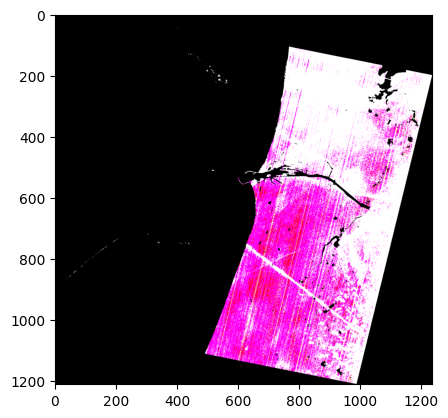

In [74]:
plt.imshow(new_tiff[:, :, 162:165])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


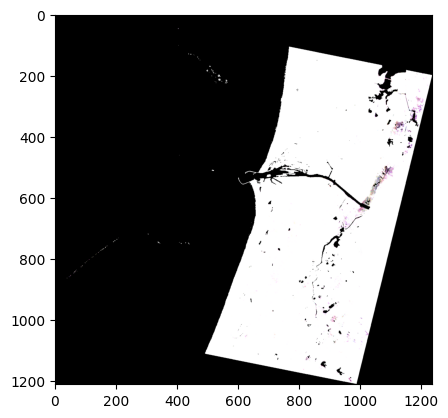

In [164]:
plt.imshow(new_tiff[:, :, 210:213])

In [173]:
red = new_tiff[:, :, 179]
green = new_tiff[:, :, 196]
blue = new_tiff[:, :, 214]
strange_image = np.stack([red, green, blue], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


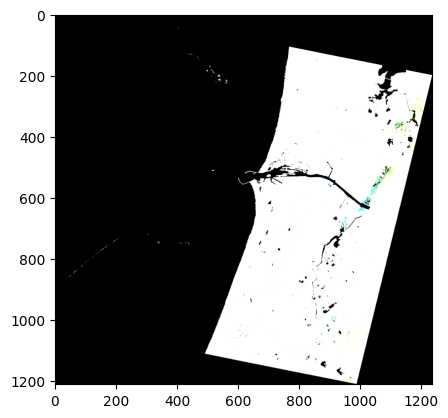

In [174]:
plt.imshow(strange_image)